# Python for data analysis and visualisation

## Online short course at the University of St Andrews

## Final assignment

### Tillman Froehlich

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

#### Dataset Refinement

Run the executable python script `refine.py` on the original dataset.

In [36]:
%run ../code/refine.py ../data/Scotland_teaching_file_1PCT.csv

script name is ../code/refine.py
All column names match.
All data types match.
Rows before removing invalid entries: 63388
Rows after removing invalid entries: 63388
Rows before deleting duplicates: 63388
Rows after deleting duplicates: 63388
Successfully wrote to Refined_dataset.csv


Now read the data off the refined dataset created by `refine.py`.

In [37]:
df = pd.read_csv("../data/Refined_dataset.csv")
df

,Record_Number,Region,RESIDENCE_TYPE,Family_Composition,sex,age,Marital_Status,student,Country_Of_Birth,health,Ethnic_Group,religion,Economic_Activity,Occupation,industry,Hours_Worked_Per_Week,Approximate_Social_Grade
0,1,S92000003,P,1,1,4,2,2,2,2,1,5,1,5,5,4,3
1,2,S92000003,P,0,1,3,1,2,1,2,1,1,1,1,8,3,2
2,3,S92000003,P,1,2,4,2,2,1,3,1,1,1,4,8,2,4
3,4,S92000003,P,1,2,6,2,2,1,1,1,1,1,2,8,4,2
4,5,S92000003,P,4,2,4,4,2,1,2,1,1,1,3,11,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63383,63384,S92000003,P,1,1,2,1,1,1,1,1,2,6,X,X,X,3
63384,63385,S92000003,P,1,1,4,2,2,1,1,1,1,1,3,9,3,2
63385,63386,S92000003,P,1,1,5,2,2,1,1,1,9,1,8,3,4,4
63386,63387,S92000003,P,4,2,1,1,1,1,1,1,9,X,X,X,X,X


This dataset can now be used for further data analysis.

#### Descriptive Analysis

* perform the descriptive analysis of the dataset:

  *    determine the total number of records in the dataset;

  *    determine the type of each variable in the dataset;

  *    for each variable except “Record_Number” and “Region”, find all different values that it takes, and the number of occurrences for each value,



In [38]:
df.shape[0]

63388

In [39]:
df.dtypes

Record_Number                int64
Region                      object
RESIDENCE_TYPE              object
Family_Composition          object
sex                          int64
age                          int64
Marital_Status               int64
student                      int64
Country_Of_Birth             int64
health                       int64
Ethnic_Group                 int64
religion                     int64
Economic_Activity           object
Occupation                  object
industry                    object
Hours_Worked_Per_Week       object
Approximate_Social_Grade    object
dtype: object

In [40]:
# Ignore "Record_Number" and "Region" columns
df_data = df.drop(["Record_Number", "Region"], axis = 1)

for col_name in df_data.columns:
    # Find all values taken in each column
    count = df_data[col_name].value_counts()
    col_index = count.index
    print(col_name)

    for value in col_index:
        # Print number of occurences of each value
        print(value, count.loc[value])

RESIDENCE_TYPE
P 62239
C 1149
Family_Composition
1 33337
0 11716
4 7757
2 7660
X 1149
3 1019
5 750
sex
2 32696
1 30692
age
1 10980
5 9336
4 8963
3 8056
6 7854
2 7541
7 5731
8 4927
Marital_Status
1 29611
2 23918
4 4159
5 4032
3 1668
student
2 51397
1 11991
Country_Of_Birth
1 59045
2 4343
health
1 33436
2 18825
3 7544
4 2759
5 824
Ethnic_Group
1 60901
3 1667
4 376
2 199
6 165
5 80
religion
2 34199
1 23309
9 4335
6 906
4 187
8 162
7 116
3 113
5 61
Economic_Activity
1 25350
5 11527
X 10980
2 3623
6 2691
8 2543
3 2183
4 1743
7 1741
9 1007
Occupation
X 14435
9 7256
2 7237
5 6140
4 6010
3 5015
7 4934
6 4484
8 4327
1 3550
industry
X 14435
4 7557
11 6817
2 6318
8 4818
10 4123
3 3876
6 3754
5 3309
9 3225
7 1979
13 1172
12 1107
1 898
Hours_Worked_Per_Week
X 32851
3 18333
2 6518
4 3543
1 2143
Approximate_Social_Grade
2 15607
4 14709
X 12090
3 11602
1 9380


#### Plotting Graphs

* build the following plots:

    * bar chart for the number of records for each age group;

    * bar chart for the number of records for each occupation,

In [47]:
def get_cats_counts(dataframe, variable):
    """Gets the distribution of 'variable' in 'dataframe'.

    Returns 2 lists:
    categories  A list of all the values taken in the
                'variable' column of 'dataframe'.
    counts      A list of how many times each category
                occurs in the column.
    """
    # Get a pandas series containing the required data
    counts_series = dataframe[variable].value_counts()

    # Extract categories and counts from this series
    categories = counts_series.index.to_list()
    counts = counts_series.to_list()

    return categories, counts

In [64]:
def bar_chart(chart_data, variable):
    """Plots a bar chart of specified variable.
    
    Uses information provided in 'chart_data'.
    """
    fig, ax = plt.subplots()

    ax.bar(*chart_data.loc[variable].to_list())

    plt.show()

In [51]:
def interactive_bar_chart(dataframe):
    """Plots a bar chart for each column of 'data'.

    Creates and interactive plot with a drop-down menu of
    all columns in 'data', which plots the distribution of
    values taken for the selected column.
    """
    chart_data = pd.DataFrame(columns = ["Categories", "Counts"])

    for i in range(len(dataframe.columns)):
        variable = dataframe.columns[i]
        categories, counts = get_cats_counts(dataframe, variable)
        chart_data.loc[variable] = [categories, counts]

    return chart_data

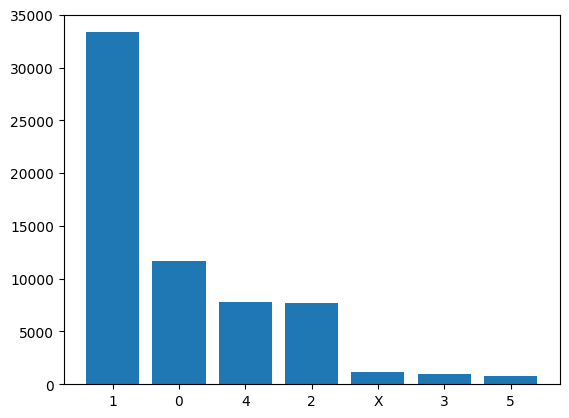

In [66]:
bar_chart(interactive_bar_chart(df_data), "Family_Composition")